# Convolutional Neural Network

### Importing the libraries

In [2]:
import pandas as pd
import os
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import matplotlib.pyplot as plt

## Part 1 - Data Preprocessing

In [3]:
print("The number of MRI Images labelled 'yes':",len(os.listdir('brain_tumor_dataset/train_data/yes')))
print("The number of MRI Images labelled 'no':",len(os.listdir('brain_tumor_dataset/train_data/no')))

The number of MRI Images labelled 'yes': 131
The number of MRI Images labelled 'no': 82


### Preprocessing the Training set

In [4]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.1,
                                   zoom_range = 0.2,
                                   rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   brightness_range=[0.3, 1.5],
                                   horizontal_flip = True,
                                   vertical_flip=True,fill_mode='nearest')
training_set = train_datagen.flow_from_directory('brain_tumor_dataset/train_data',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 213 images belonging to 2 classes.


### Preprocessing the Test set

In [5]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('./brain_tumor_dataset/test_data',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 40 images belonging to 2 classes.


In [13]:

# datagen = ImageDataGenerator(
#         rotation_range=15,
#         width_shift_range=0.2,
#         height_shift_range=0.2,
#         shear_range=0.2,
#         zoom_range=0.2,
#         horizontal_flip=True,
#         fill_mode='nearest')

img = load_img('brain_tumor_dataset/train_data/yes/Y1.jpg')  # this is a PIL image
x = img_to_array(img)  # this is a Numpy array with shape (3, 150, 150)
x = x.reshape((1,) + x.shape)  # this is a Numpy array with shape (1, 3, 150, 150)

# the .flow() command below generates batches of randomly transformed images
# and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(x, batch_size=1,
                          save_to_dir='brain_tumor_dataset/augmented', save_prefix='mri', save_format='jpeg'):
    i += 1
    if i > 20:
        break  # otherwise the generator would loop indefinitely

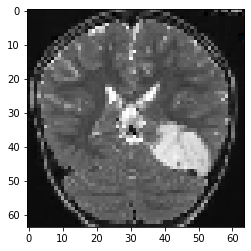

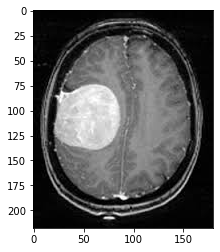

In [6]:
image = test_set[0]
plt.imshow(image[0][31])
plt.show()
img = load_img('brain_tumor_dataset/train_data/yes/Y1.jpg')
plt.imshow(img)
plt.show()

## Part 2 - Building the CNN

### Initialising the CNN

In [82]:
cnn = tf.keras.models.Sequential()

###  Convolution

In [83]:
#cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3],padding='same') )

###  Pooling

In [86]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2,padding='same'))

### Adding a second convolutional layer

In [87]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2,padding='same'))

### Flattening

In [88]:
cnn.add(tf.keras.layers.Flatten())

### Full Connection

In [89]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

###  Output Layer

In [90]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [91]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [92]:
model=cnn.fit(x = training_set, validation_data = test_set, epochs = 25)

Epoch 1/25
7/7 [==============================] - 2s 299ms/step - loss: 0.6579 - accuracy: 0.6103 - val_loss: 0.5719 - val_accuracy: 0.7250
Epoch 2/25
7/7 [==============================] - 2s 254ms/step - loss: 0.5992 - accuracy: 0.7042 - val_loss: 0.4618 - val_accuracy: 0.7750
Epoch 3/25
7/7 [==============================] - 2s 246ms/step - loss: 0.5699 - accuracy: 0.6948 - val_loss: 0.4966 - val_accuracy: 0.7500
Epoch 4/25
7/7 [==============================] - 2s 250ms/step - loss: 0.5856 - accuracy: 0.7230 - val_loss: 0.4728 - val_accuracy: 0.7750
Epoch 5/25
7/7 [==============================] - 2s 237ms/step - loss: 0.5736 - accuracy: 0.6995 - val_loss: 0.4906 - val_accuracy: 0.7750
Epoch 6/25
7/7 [==============================] - 2s 242ms/step - loss: 0.5480 - accuracy: 0.7465 - val_loss: 0.5130 - val_accuracy: 0.7000
Epoch 7/25
7/7 [==============================] - 3s 390ms/step - loss: 0.5679 - accuracy: 0.7606 - val_loss: 0.5243 - val_accuracy: 0.7000
Epoch 8/25
7/7 [====

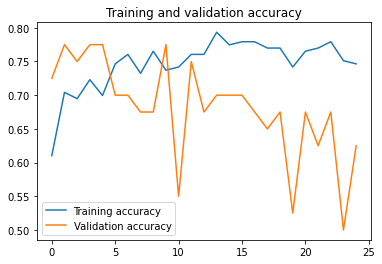

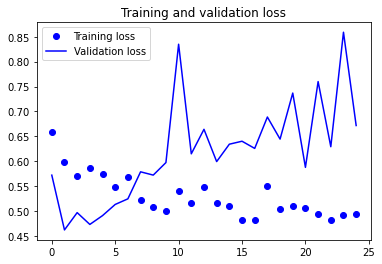

In [93]:
accuracy = model.history['accuracy']
val_accuracy = model.history['val_accuracy']
loss = model.history['loss']
val_loss = model.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy , label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [95]:
cnn = tf.keras.models.Sequential()

In [96]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3],padding='same') )
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2,padding='same'))

In [57]:
cnn.add(tf.keras.layers.Dropout(0.4))

In [97]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu',padding='same'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2,padding='same'))

In [98]:
cnn.add(tf.keras.layers.Dropout(0.3))

In [99]:
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

In [100]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [103]:
model=cnn.fit(x = training_set, validation_data = test_set, epochs = 50)

Epoch 1/50
7/7 [==============================] - 2s 289ms/step - loss: 0.4913 - accuracy: 0.7840 - val_loss: 0.6641 - val_accuracy: 0.6500
Epoch 2/50
7/7 [==============================] - 2s 253ms/step - loss: 0.5101 - accuracy: 0.7371 - val_loss: 0.7234 - val_accuracy: 0.6250
Epoch 3/50
7/7 [==============================] - 2s 271ms/step - loss: 0.4954 - accuracy: 0.7840 - val_loss: 0.7107 - val_accuracy: 0.6250
Epoch 4/50
7/7 [==============================] - 2s 268ms/step - loss: 0.4623 - accuracy: 0.8310 - val_loss: 0.7883 - val_accuracy: 0.6250
Epoch 5/50
7/7 [==============================] - 2s 266ms/step - loss: 0.4840 - accuracy: 0.7746 - val_loss: 0.6980 - val_accuracy: 0.6500
Epoch 6/50
7/7 [==============================] - 2s 286ms/step - loss: 0.5144 - accuracy: 0.7653 - val_loss: 0.9865 - val_accuracy: 0.4750
Epoch 7/50
7/7 [==============================] - 2s 345ms/step - loss: 0.5100 - accuracy: 0.7840 - val_loss: 0.5667 - val_accuracy: 0.7000
Epoch 8/50
7/7 [====

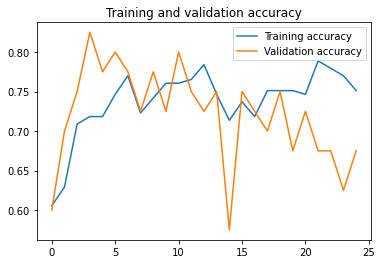

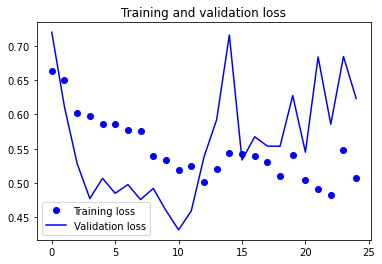

In [102]:
accuracy = model.history['accuracy']
val_accuracy = model.history['val_accuracy']
loss = model.history['loss']
val_loss = model.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

## Part 4 - Making a single prediction

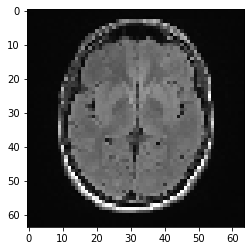

In [72]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('./brain_tumor_dataset/check/1.jpeg', target_size = (64, 64))
plt.imshow(test_image)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'Yes'
else:
  prediction = 'No'

In [70]:
print(prediction)

No
